In [1]:
import pandas as pd
import numpy as np 

In [2]:
#Load dataset
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Data Preprocessing

In [3]:
#checking for missing values
nullval = df.isnull().values.any()
print(nullval)

False


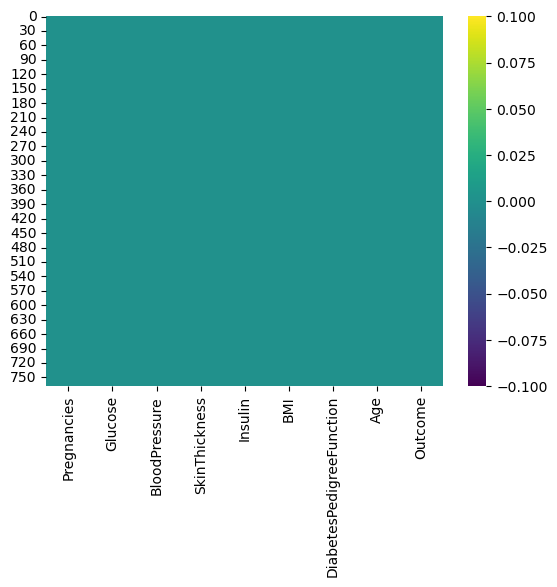

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

#heat map for null values 
sns.heatmap(df.isnull(), cbar = True, cmap = 'viridis')
plt.show()

In [5]:
#removing duplicates 
df.drop_duplicates(inplace = True)

In [35]:
#statistics 
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.837240,121.136230,70.684896,20.511719,73.652669,32.125065,0.458914,33.199870,0.348958
std,3.344157,31.187468,14.197239,15.844744,93.576029,7.049584,0.285596,11.628404,0.476951
min,0.000000,37.125000,35.000000,0.000000,0.000000,13.350000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,13.500000,199.000000,107.000000,80.000000,318.125000,50.550000,1.200000,66.500000,1.000000


In [7]:
#Handling outliers 

# Define function to cap outliers
def cap_outliers(x, lower_bound, upper_bound):
    if x < lower_bound:
        return lower_bound
    elif x > upper_bound:
        return upper_bound
    else:
        return x

# Loop through each numeric column and apply outlier capping
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap outliers in place
    df[col] = df[col].apply(lambda x: cap_outliers(x, lower_bound, upper_bound))


In [8]:
#Targets and features 

X = df.drop(columns= ['Outcome']) #Selecting features
y= df['Outcome'] #selecting target



In [9]:
#Training and splitting dataset 
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state =42)

In [10]:
#Scaling and normalization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)


374


Exploratory Data Analysis 

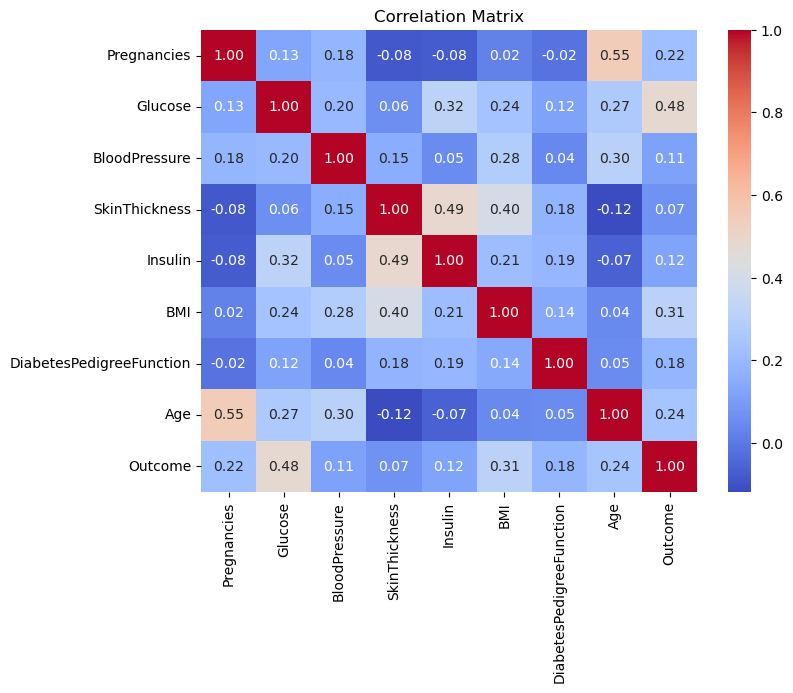

In [11]:
#Checking for relationship between the variables
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot = True, fmt = '.2f', cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

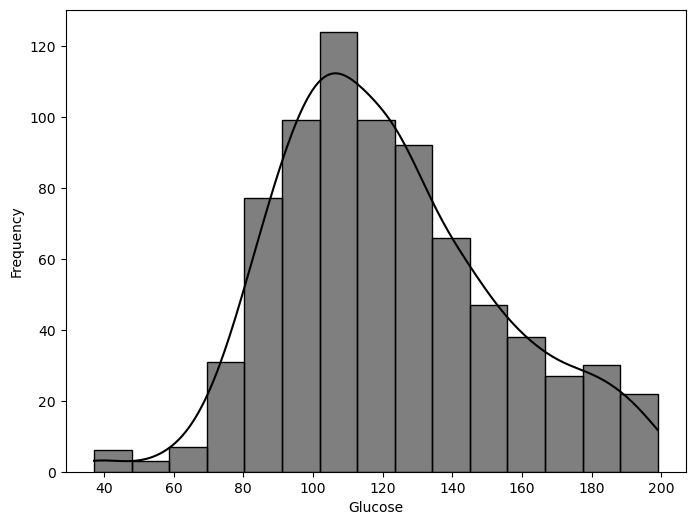

In [27]:
#distribution of Age
plt.figure(figsize=(8,6))
sns.histplot(df['Glucose'], bins = 15 , kde = True, color = 'black') #age should be grouped into 15 intervals
plt.xlabel('Glucose')
plt.ylabel('Frequency')
#plt.title('The distribution of Glucose')
plt.savefig('GlucoseDiabetes.png') #Saving picture 
plt.show()

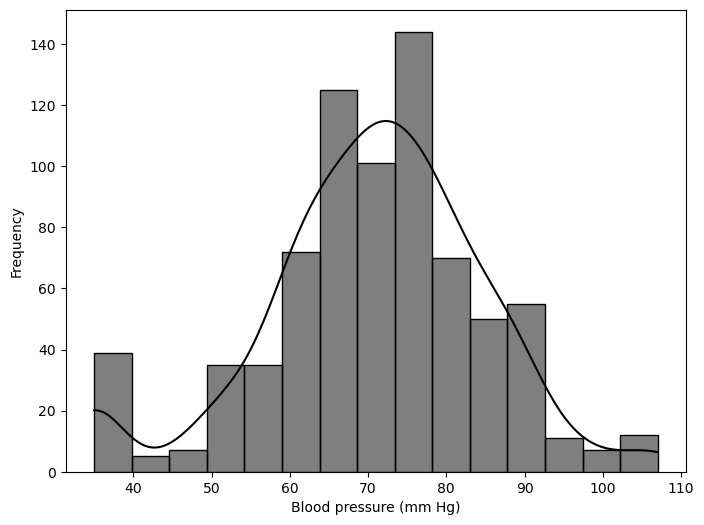

In [20]:
#Distribution of blood pressure 
plt.figure(figsize=(8,6))
sns.histplot(df['BloodPressure'], bins = 15, kde = True, color = 'black')
#plt.title('Distribution of Blood Pressure')
plt.xlabel('Blood pressure (mm Hg)')
plt.ylabel('Frequency')
plt.savefig('BP.png')
plt.show()

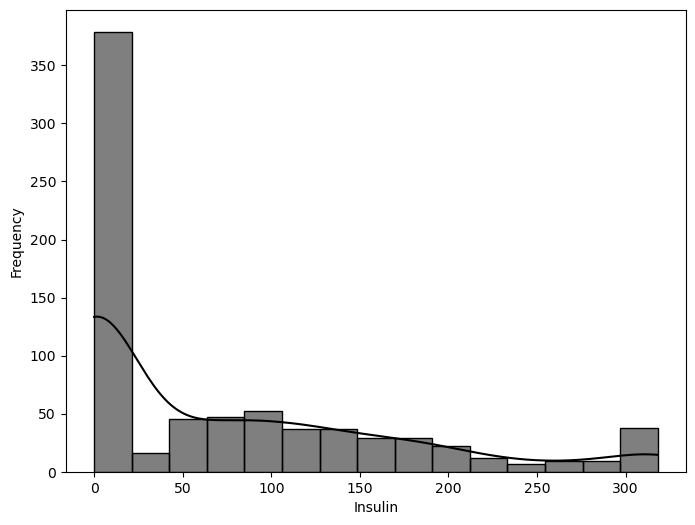

In [28]:
#Distribution of Insulin 
plt.figure(figsize=(8,6))
sns.histplot(df['Insulin'], bins = 15, kde = True, color = 'black')
#plt.title('Distribution of Insulin')
plt.xlabel('Insulin')
plt.ylabel('Frequency')
plt.savefig('Insulin.png')
plt.show()

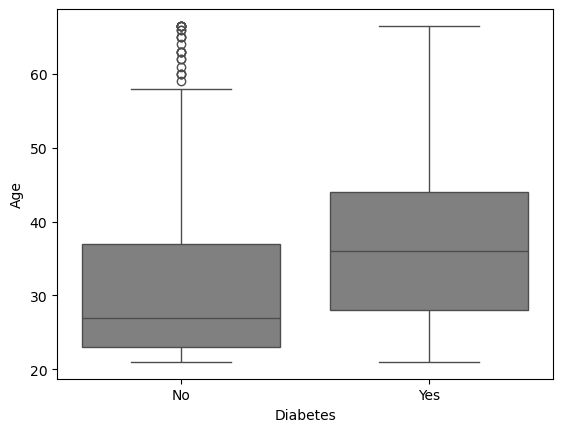

In [15]:
#Box plot between individuals with diabetuc and non-diabetic
sns.boxplot(x = 'Outcome', y= 'Age', data = df, color = 'grey')
plt.ylabel('Age')
plt.xlabel('Diabetes')
plt.xticks(ticks = [0,1], labels = ['No', 'Yes']) #Displaying Yes or No for individuals with diabets instead of 1 AND 0
#plt.title('Age variation between diabetic and non-diabetic individuals')
plt.savefig('Agediabe.png')
plt.show()

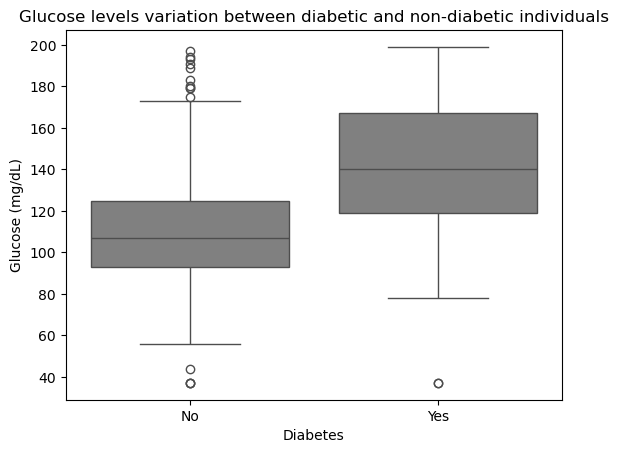

In [26]:
#Box plot between individuals with diabetuc and non-diabetic
sns.boxplot(x = 'Outcome', y= 'Glucose', data = df, color = 'grey')
plt.ylabel('Glucose (mg/dL)')
plt.xlabel('Diabetes')
plt.xticks(ticks = [0,1], labels = ['No', 'Yes']) #Displaying Yes or No for individuals with diabets instead of 1 AND 0
plt.title('Glucose levels variation between diabetic and non-diabetic individuals')
plt.savefig('Glucosevsdiabetic.png')
plt.show()


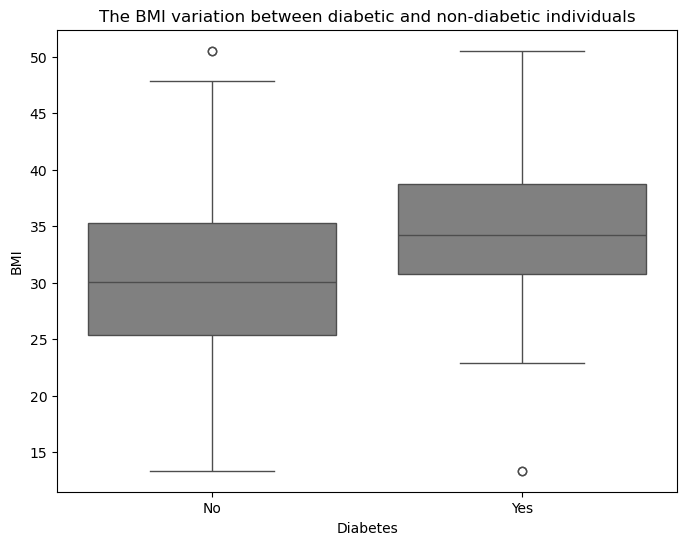

In [17]:
#Create box plot of Bmi and diabete
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Outcome', y = 'BMI', color = 'grey')
plt.xlabel('Diabetes')
plt.xticks(ticks=[0,1], labels= ['No', 'Yes'])
plt.ylabel('BMI')
plt.title('The BMI variation between diabetic and non-diabetic individuals')
plt.savefig('diabeticvsbmi.png')
plt.show()

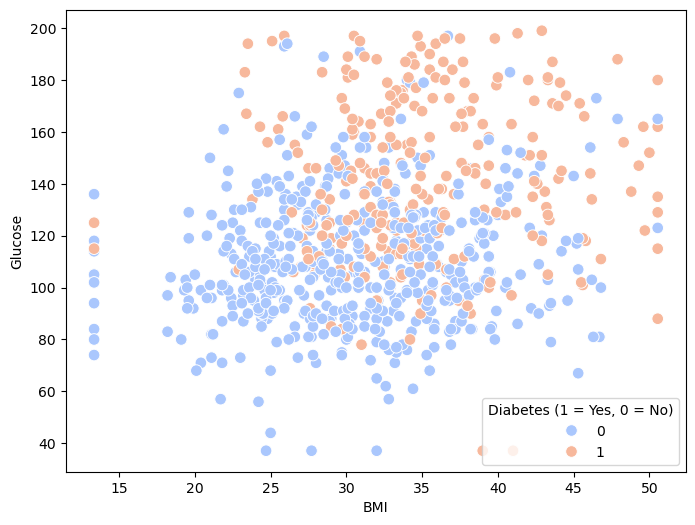

In [29]:
# Create the scatter plot 
"""hue - color of the points based on Outcome column
s - is the size of the points"""
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='BMI', y='Glucose', hue='Outcome', palette='coolwarm', s=70)
#plt.title('Scatter Plot of BMI vs. Glucose with Diabetes Status')
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.legend(title='Diabetes (1 = Yes, 0 = No)', loc = 'lower right')
plt.savefig('GlucosevsDia.png') #Save the image
plt.show()

Model Selection and Training

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(random_state=42)

# Hyperparameter grid for tuning
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and model
print(f"Best Parameters: {grid_search.best_params_}")

# Make predictions and evaluate
y_pred = grid_search.best_estimator_.predict(X_test_scaled)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [33]:
from sklearn.metrics import accuracy_score, classification_report 

#Accuracy and classification report
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Classification report \n: {classification_report(y_test, y_pred)}')

Accuracy: 0.7662337662337663
Classification report 
:               precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154

